In [1]:
import os
import sys
sys.path.append("..")
import json
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

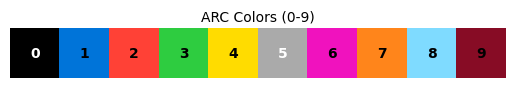

In [2]:
arc_colors = ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
              '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25']
cmap = ListedColormap(arc_colors)
norm = BoundaryNorm(range(11), cmap.N)

plt.imshow([range(10)], cmap=cmap)
for i in range(10):
    plt.text(i, 0, str(i), ha='center', va='center',
             fontsize=10, fontweight='bold',
             color='white' if i in [0, 5] else 'black')
plt.axis('off')
plt.title("ARC Colors (0-9)", fontsize=10)
plt.show()

In [3]:
def read_json(json_path: str):
    with open(json_path, "r") as f:
        tasks = json.load(f)
    
    return tasks

arc_agi_training_challenges = read_json("../data/arc-agi_training_challenges.json")
arc_agi_training_solutions = read_json("../data/arc-agi_training_solutions.json")
# arc_agi_training_challenges = read_json("../data/arc-agi_training_challenges.json")
# arc_agi_training_challenges = read_json("../data/arc-agi_training_challenges.json")

In [4]:
def plot_one(ax, mat, title=""):
    ax.imshow(mat, cmap=cmap, norm=norm)
    ax.set_title(title, fontsize=8)
    ax.axis('off')


def visualize(tasks, solutions, start=0, end=10):
    keys = list(tasks.keys())[start:end]

    for i, task_id in enumerate(keys):
        print(f"# {i}, Task ID: {task_id}")
        
        task = tasks[task_id]

        solution = solutions.get(task_id, [None])[0]
        if solution is None:
            continue

        train = task.get('train', [])
        test = task.get('test', [])
        total = len(train) + (1 if test else 0)

        fig, axs = plt.subplots(2, total, figsize=(2 * total, 4))
        axs = np.atleast_2d(axs)

        fig.suptitle(f"Task: {task_id}", fontsize=12)

        for j, pair in enumerate(train):
            plot_one(axs[0, j], pair['input'], f"Train {j} Input")
            plot_one(axs[1, j], pair['output'], f"Train {j} Output")

        if test:
            plot_one(axs[0, len(train)], test[0]['input'], "Test Input")
            plot_one(axs[1, len(train)], solution, "Test Output")

        plt.tight_layout()
        plt.show()
        plt.close(fig)

# 0, Task ID: 00576224


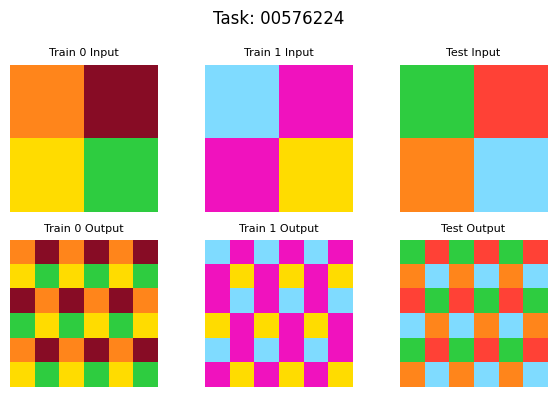

# 1, Task ID: 007bbfb7


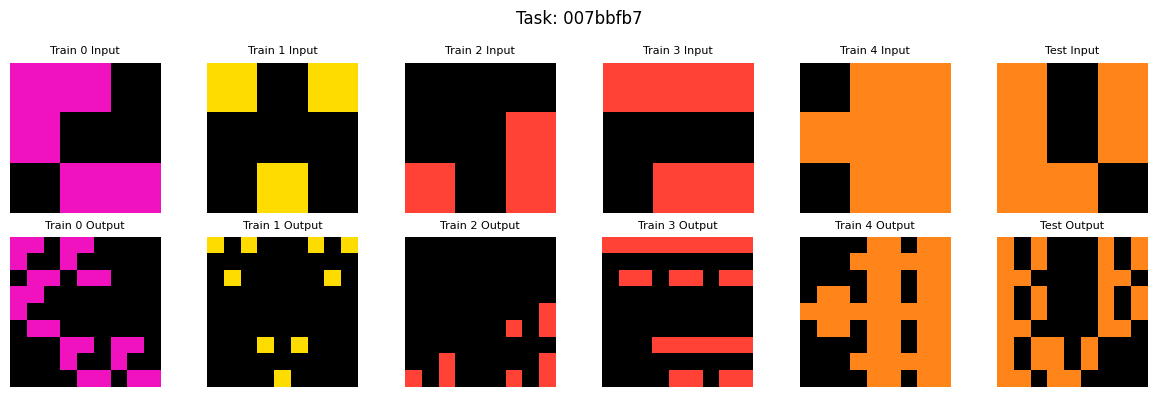

# 2, Task ID: 009d5c81


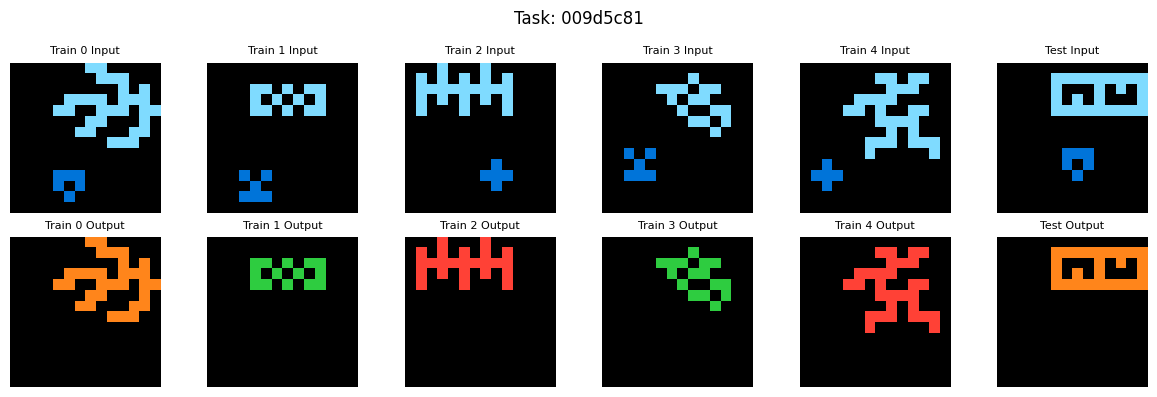

# 3, Task ID: 00d62c1b


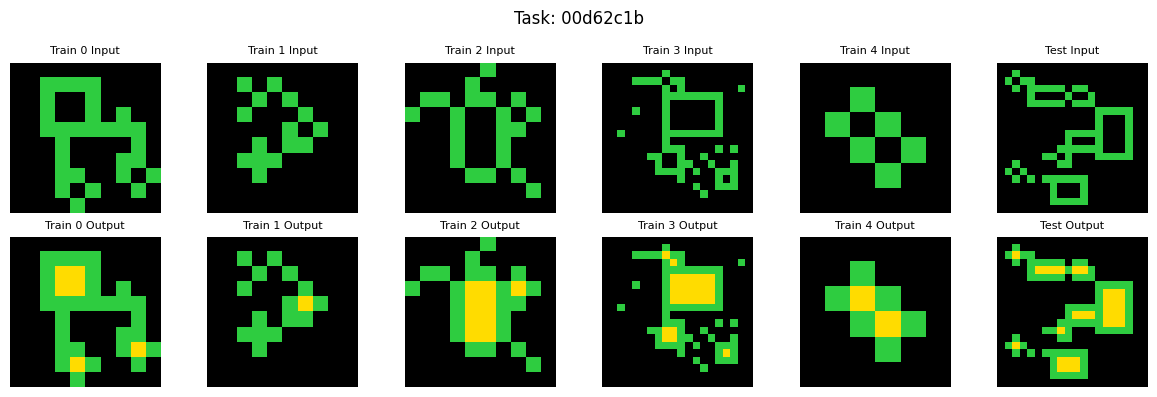

# 4, Task ID: 00dbd492


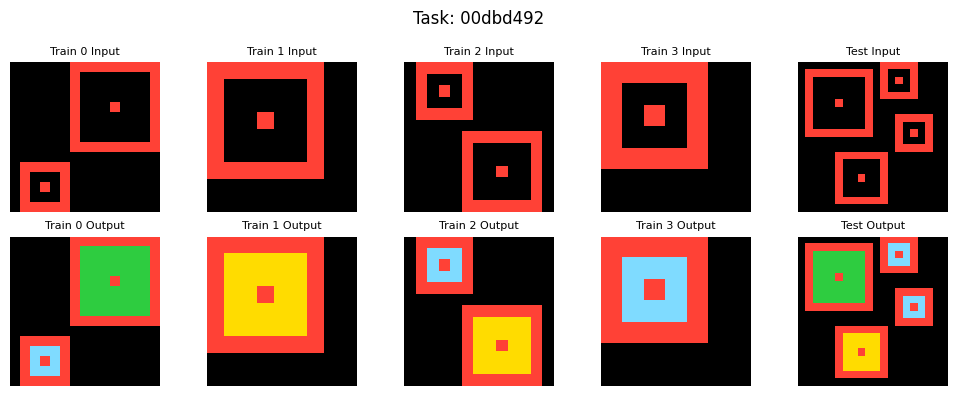

# 5, Task ID: 017c7c7b


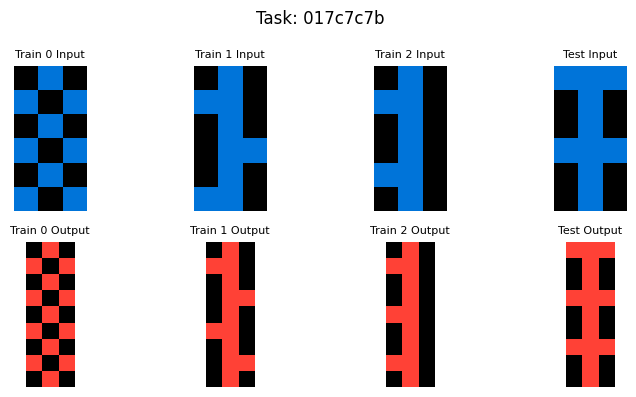

# 6, Task ID: 025d127b


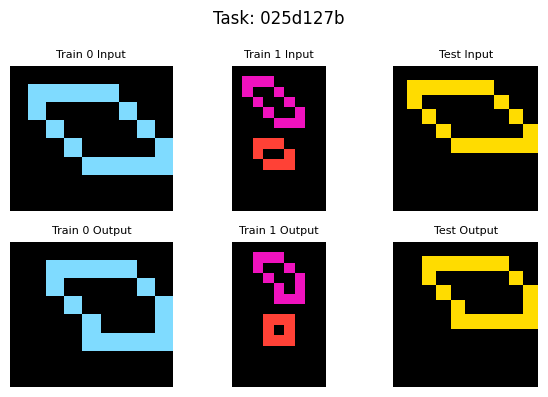

# 7, Task ID: 03560426


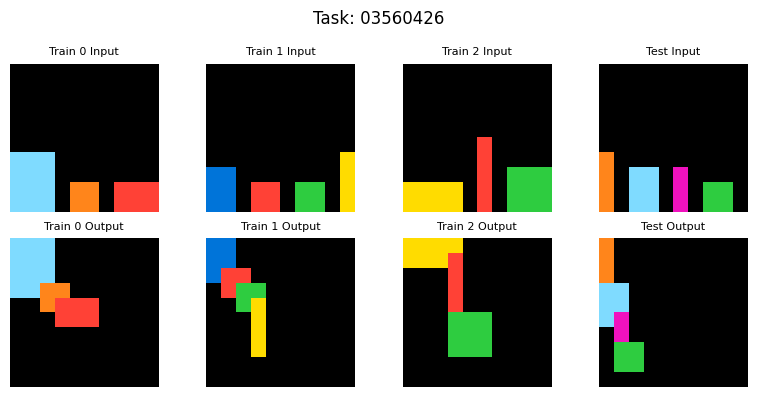

# 8, Task ID: 045e512c


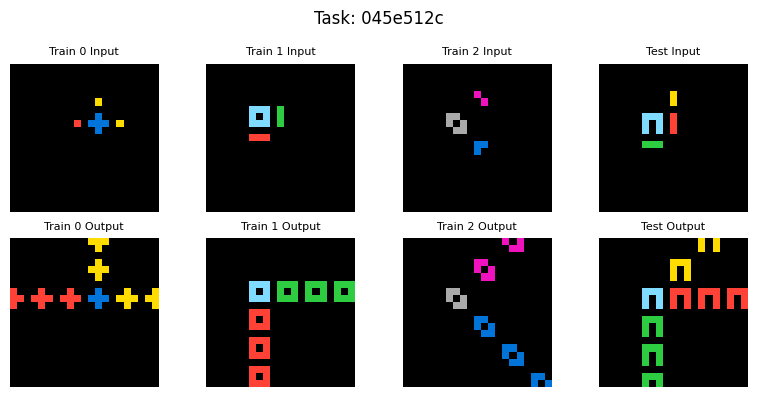

# 9, Task ID: 0520fde7


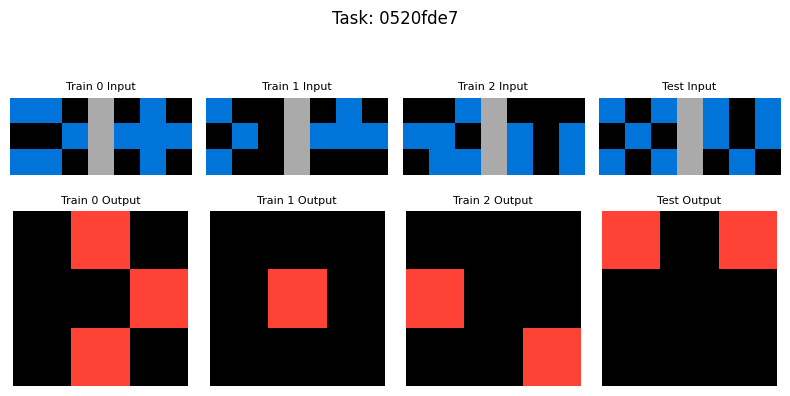

In [5]:
visualize(arc_agi_training_challenges, arc_agi_training_solutions)